<a href="https://colab.research.google.com/github/KseniiaHoncharova/KseniiaHoncharova/blob/main/%22Python_Project_World_Population_Data_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse World Population Data

## Task

Find out what might make countries better.
1. Have a look at the variables, understand what they are.
2. Pick a variable which interests you in a country.
2. Which other variables are associated with your target variable? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset description

_Source: https://www.kaggle.com/datasets/madhurpant/world-population-data
  (See the bottom of this notebook for the steps to re-create it)_

This dataset describes 192 countries and their populations. Here are the columns, grouped by topic:

1. Height and weight:
    - male_height
    - female_height
    - male_weight
    - female_weight
    - male_bmi
    - female_bmi

2. Life expectancy:
    - male_life_expectancy
    - female_life_expectancy
    - birth_rate
    - death_rate

3. Population density:
    - area
    - population
    - pop_per_km_sq

4. Quality of life:
    - stability
    - rights
    - health
    - safety
    - climate
    - costs
    - popularity

5. Other:
    - iq
    - education_expenditure_per_inhabitant
    - daily_max_temp


## Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# From https://drive.google.com/file/d/181fFa4h4EigLpMlyu3DXaptm41tXVrNS/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=181fFa4h4EigLpMlyu3DXaptm41tXVrNS",
    index_col=0,
)
df.shape

(192, 23)

In [ ]:
df.columns

Index(['male_life_expectancy', 'female_life_expectancy', 'birth_rate',
       'death_rate', 'iq', 'education_expenditure_per_inhabitant',
       'daily_max_temp', 'stability', 'rights', 'health', 'safety', 'climate',
       'costs', 'popularity', 'area', 'population', 'pop_per_km_sq',
       'male_height', 'female_height', 'male_weight', 'female_weight',
       'male_bmi', 'female_bmi'],
      dtype='object')

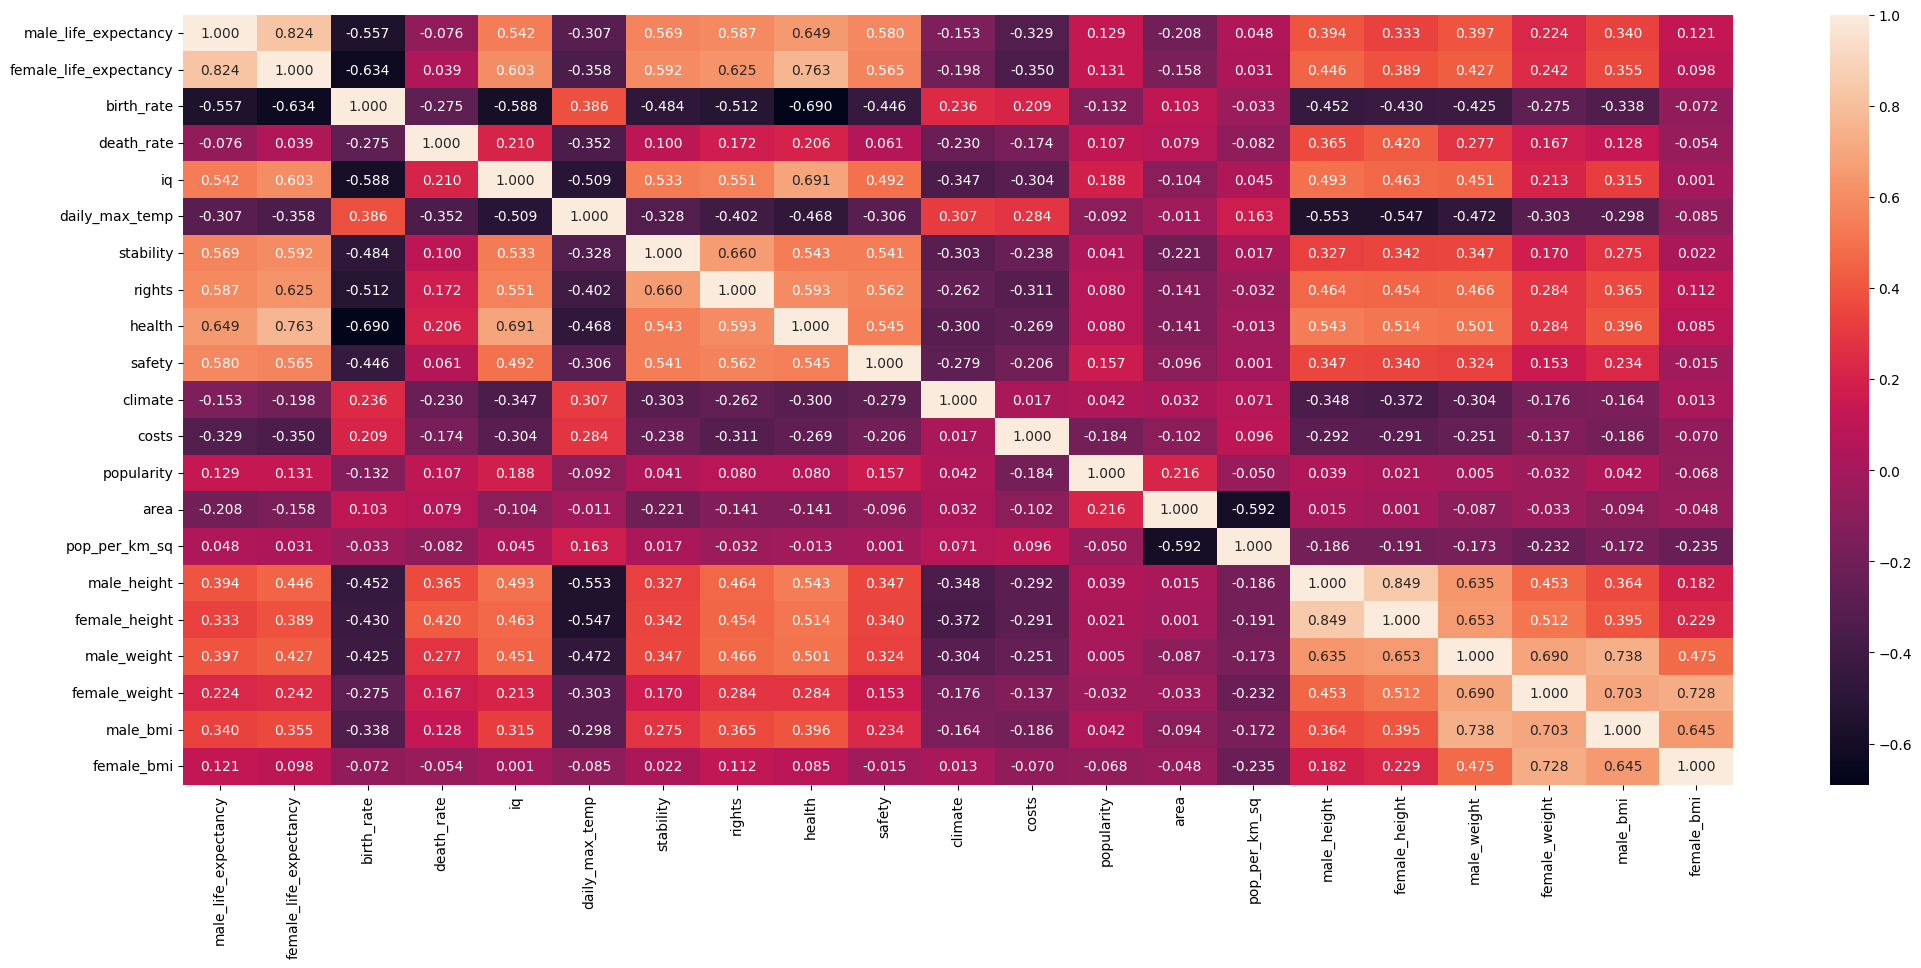

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,10))
df_subset_non_string = df.select_dtypes(exclude="object")
sns.heatmap(df_subset_non_string.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

In [ ]:
df[df.columns[::-1]].head()

,female_bmi,male_bmi,female_weight,male_weight,female_height,male_height,pop_per_km_sq,population,area,popularity,...,health,rights,stability,daily_max_temp,education_expenditure_per_inhabitant,iq,death_rate,birth_rate,female_life_expectancy,male_life_expectancy
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,23.8,24.5,61.1,74.4,160.0,174.0,NaN,NaN,NaN,52.0,...,100.0,85.0,77.0,26.2,915,108.0,6.8,5.8,88.0,82.9
Iceland,25.6,27.1,72.6,89.2,168.0,181.0,NaN,NaN,NaN,33.0,...,87.0,92.0,82.0,8.1,"2,443",101.0,7.8,12.3,84.5,81.7
Japan,21.9,23.6,54.8,69.5,158.0,172.0,332.5,125.68 M,377970.0,41.0,...,92.0,86.0,87.0,19.2,"1,258",105.0,8.8,6.8,87.7,81.6
Norway,26.2,27.4,72.6,89.1,166.0,180.0,14.0,5.41 M,385203.0,37.0,...,90.0,99.0,89.0,9.0,"3,527",99.0,9.8,9.8,84.9,81.6
Singapore,23.2,24.3,60.2,72.8,161.0,173.0,7584.9,5.45 M,719.0,42.0,...,79.0,89.0,83.0,31.5,908,108.0,10.8,8.5,86.1,81.5


In [ ]:
df_subset_string = df.select_dtypes(include="object")
df_subset_string.head()

,education_expenditure_per_inhabitant,population
country,,
Hong Kong,915,NaN
Iceland,"2,443",NaN
Japan,"1,258",125.68 M
Norway,"3,527",5.41 M
Singapore,908,5.45 M


#1 Stability affects on the birth positiv?

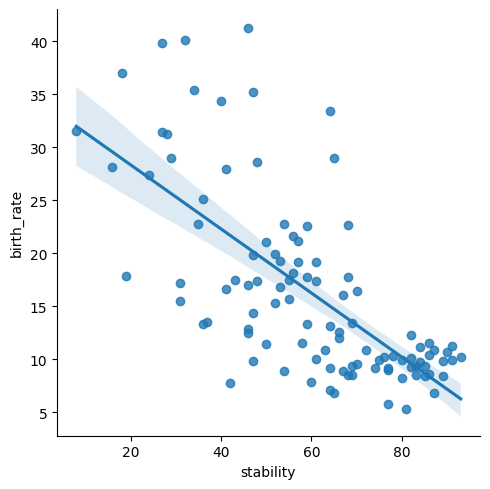

In [ ]:
sns.lmplot(df, x = 'stability', y = 'birth_rate')

#So as we see the hypotise is not true, stability in the country negatively affects the berth rate

#2. How does stability affect on the rights, life expectancy, health and costs?

<Axes: xlabel='stability', ylabel='male_life_expectancy'>

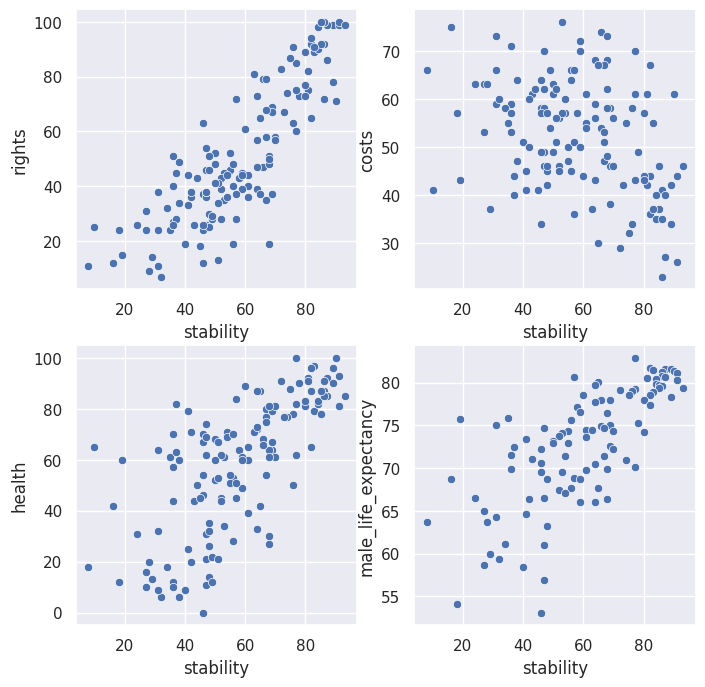

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

sns.scatterplot(df,x="stability",y="rights",ax=axes[0,0])
sns.scatterplot(df,x="stability",y="costs",ax=axes[0,1])
sns.scatterplot(df,x="stability",y="health",ax=axes[1,0])
sns.scatterplot(df,x="stability",y="male_life_expectancy",ax=axes[1,1])

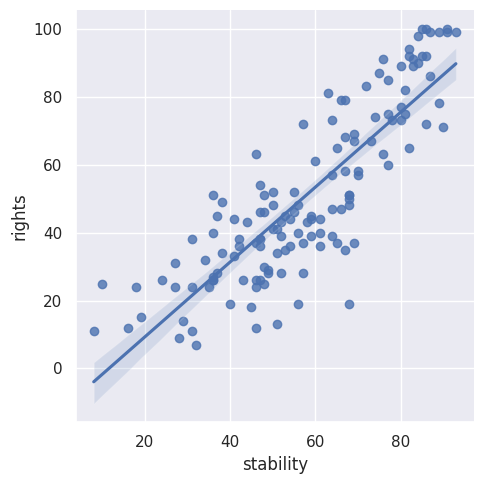

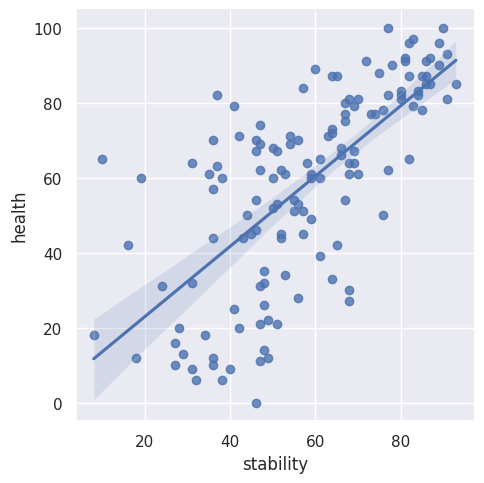

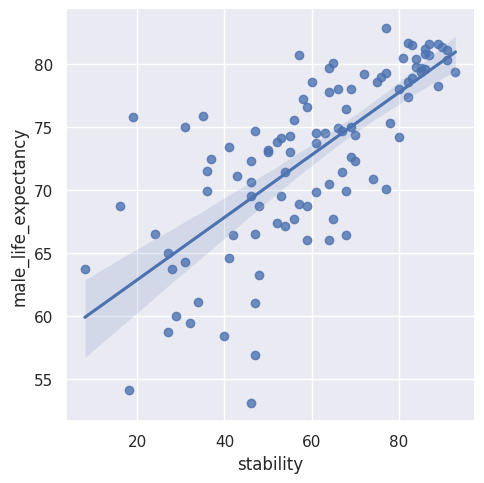

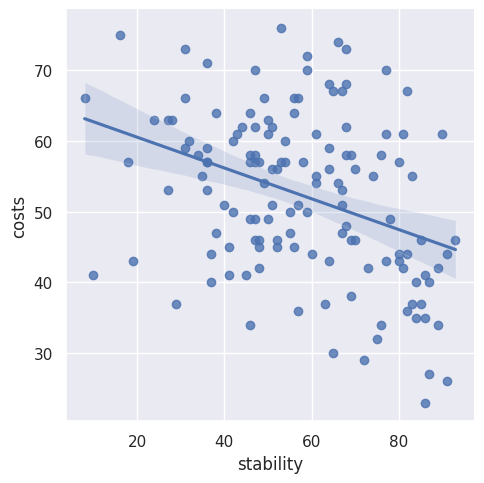

In [ ]:
sns.lmplot(df,x="stability",y="rights")
sns.lmplot(df,x="stability",y="health")
sns.lmplot(df,x="stability",y="male_life_expectancy")
sns.lmplot(df,x="stability",y="costs")

#As we see stability has positive effect on rights, health, life expectancy, but has negativ effect on costs=this means that prices in countries  with more stable economies are more expensive.

#3. The best country for living?

In [ ]:
best_country=df.groupby('country')[["stability"]].max()
best_country

,stability
country,
Afghanistan,28.0
Albania,58.0
Algeria,35.0
American Samoa,NaN
Andorra,NaN
...,...
Vietnam,67.0
Virgin Islands,NaN
Yemen,NaN


In [ ]:
a=best_country.max()
a

stability    93.0
dtype: float64

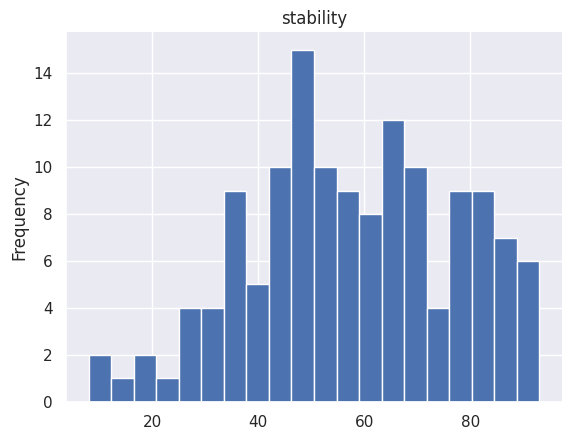

In [ ]:
best_country['stability'].plot(kind='hist', bins=20, title='stability')
plt.gca().spines[['top', 'right',]].set_visible(False)

# How the dataframe was created


This section is not relevant for doing the project, you can ignore it.

In case the dataset needs to be recreated, or if you are a very curious student, this is how it was done (on a local machine, _not_ in Colab):

```python
import pandas as pd
import glob
from functools import reduce

# 1. Download and extract data from
#    https://www.kaggle.com/datasets/madhurpant/world-population-data

# 2. Merge all dataframes
joint_df = reduce(
    lambda df1, df2: df1.merge(df2, on="country", how="outer"),
    [pd.read_csv(path) for path in glob.glob("world-population-data/*")],
)

# 3. Make "country" the index
joint_df.set_index(["country"], inplace=True)

# 4. Save the result
joint_df.to_csv("world-population-data.csv")
```